In [2]:
# pip install yfinance --upgrade --no-cache-dir

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from  datetime import datetime
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_rows', 1500)


In [2]:
ticka_masta=pd.DataFrame()
for ticker in ['AGC',	'ASM',	'AUN',	'COD',	'CST',	'MHK',	'NMR',	'OZM',	'RCR',	'SNG',	'SSR']:
    tx=ticker+".AX"
    data = yf.download(tickers=tx, period="3mo",interval="1d",group_by = 'ticker',auto_adjust = True,threads = True).reset_index()
    dt=data[['Date','Close']]
    dt['ticker']=ticker
    ticka_masta=ticka_masta.append(dt)

[*********************100%***********************]  1 of 1 completed


<ipython-input-2-a5cf05e2cc43>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['ticker']=ticker


[*********************100%***********************]  1 of 1 completed


<ipython-input-2-a5cf05e2cc43>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['ticker']=ticker


[*********************100%***********************]  1 of 1 completed


<ipython-input-2-a5cf05e2cc43>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['ticker']=ticker


[*********************100%***********************]  1 of 1 completed


<ipython-input-2-a5cf05e2cc43>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['ticker']=ticker


[*********************100%***********************]  1 of 1 completed


<ipython-input-2-a5cf05e2cc43>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['ticker']=ticker


[*********************100%***********************]  1 of 1 completed


<ipython-input-2-a5cf05e2cc43>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['ticker']=ticker


[*********************100%***********************]  1 of 1 completed


<ipython-input-2-a5cf05e2cc43>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['ticker']=ticker


[*********************100%***********************]  1 of 1 completed


<ipython-input-2-a5cf05e2cc43>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['ticker']=ticker


[*********************100%***********************]  1 of 1 completed


<ipython-input-2-a5cf05e2cc43>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['ticker']=ticker


[*********************100%***********************]  1 of 1 completed


<ipython-input-2-a5cf05e2cc43>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['ticker']=ticker


[*********************100%***********************]  1 of 1 completed


<ipython-input-2-a5cf05e2cc43>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['ticker']=ticker


In [3]:
ticka_min=ticka_masta.groupby(['ticker'])['Close'].min().reset_index()
ticka_min.columns = ['ticker','ticka_min']
ticka_max=ticka_masta.groupby(['ticker'])['Close'].max().reset_index()
ticka_max.columns = ['ticker','ticka_max']
ticka_masta=pd.merge(ticka_masta,ticka_min[['ticker','ticka_min']],left_on='ticker',right_on='ticker',how='inner')
ticka_masta=pd.merge(ticka_masta,ticka_max[['ticker','ticka_max']],left_on='ticker',right_on='ticker',how='inner')
ticka_masta['ticka_norm'] = (ticka_masta['Close']-ticka_masta['ticka_min'])/(ticka_masta['ticka_max']-ticka_masta['ticka_min'])
ticka_masta.head()

,Date,Close,ticker,ticka_min,ticka_max,ticka_norm
0,2021-01-20,0.205,AGC,0.155,0.215,0.833333
1,2021-01-21,0.215,AGC,0.155,0.215,1.000000
2,2021-01-22,0.210,AGC,0.155,0.215,0.916667
3,2021-01-25,0.200,AGC,0.155,0.215,0.750000
4,2021-01-27,0.195,AGC,0.155,0.215,0.666667


(array([18597., 18611., 18628., 18642., 18659., 18673.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

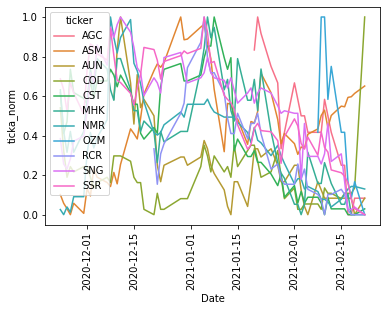

In [4]:
sns.lineplot(data=ticka_masta, x="Date", y="ticka_norm",hue="ticker")
plt.xticks(rotation=90)